In [10]:
import numpy as np
import matplotlib.pyplot as plt

import random
CNOT_matrix=np.array([[1,0,0,0],
                      [0,1,0,0],
                      [0,0,0,1],
                      [0,0,1,0]])
hadamard=(1/(np.sqrt(2)))*np.array([[1, 1],[1,-1]])

swap= np.array([[1,0,0,0],
                [0,0,1,0],
                [0,1,0,0],
                [0,0,0,1]])

qubit_0 =  np.array([1,0]).reshape(2,)
qubit_1 =  np.array([0,1]).reshape(2,)
qubit_00 = np.kron(qubit_0,qubit_0)
qubit_11 = np.kron(qubit_1,qubit_1)

identity = np.identity(2)


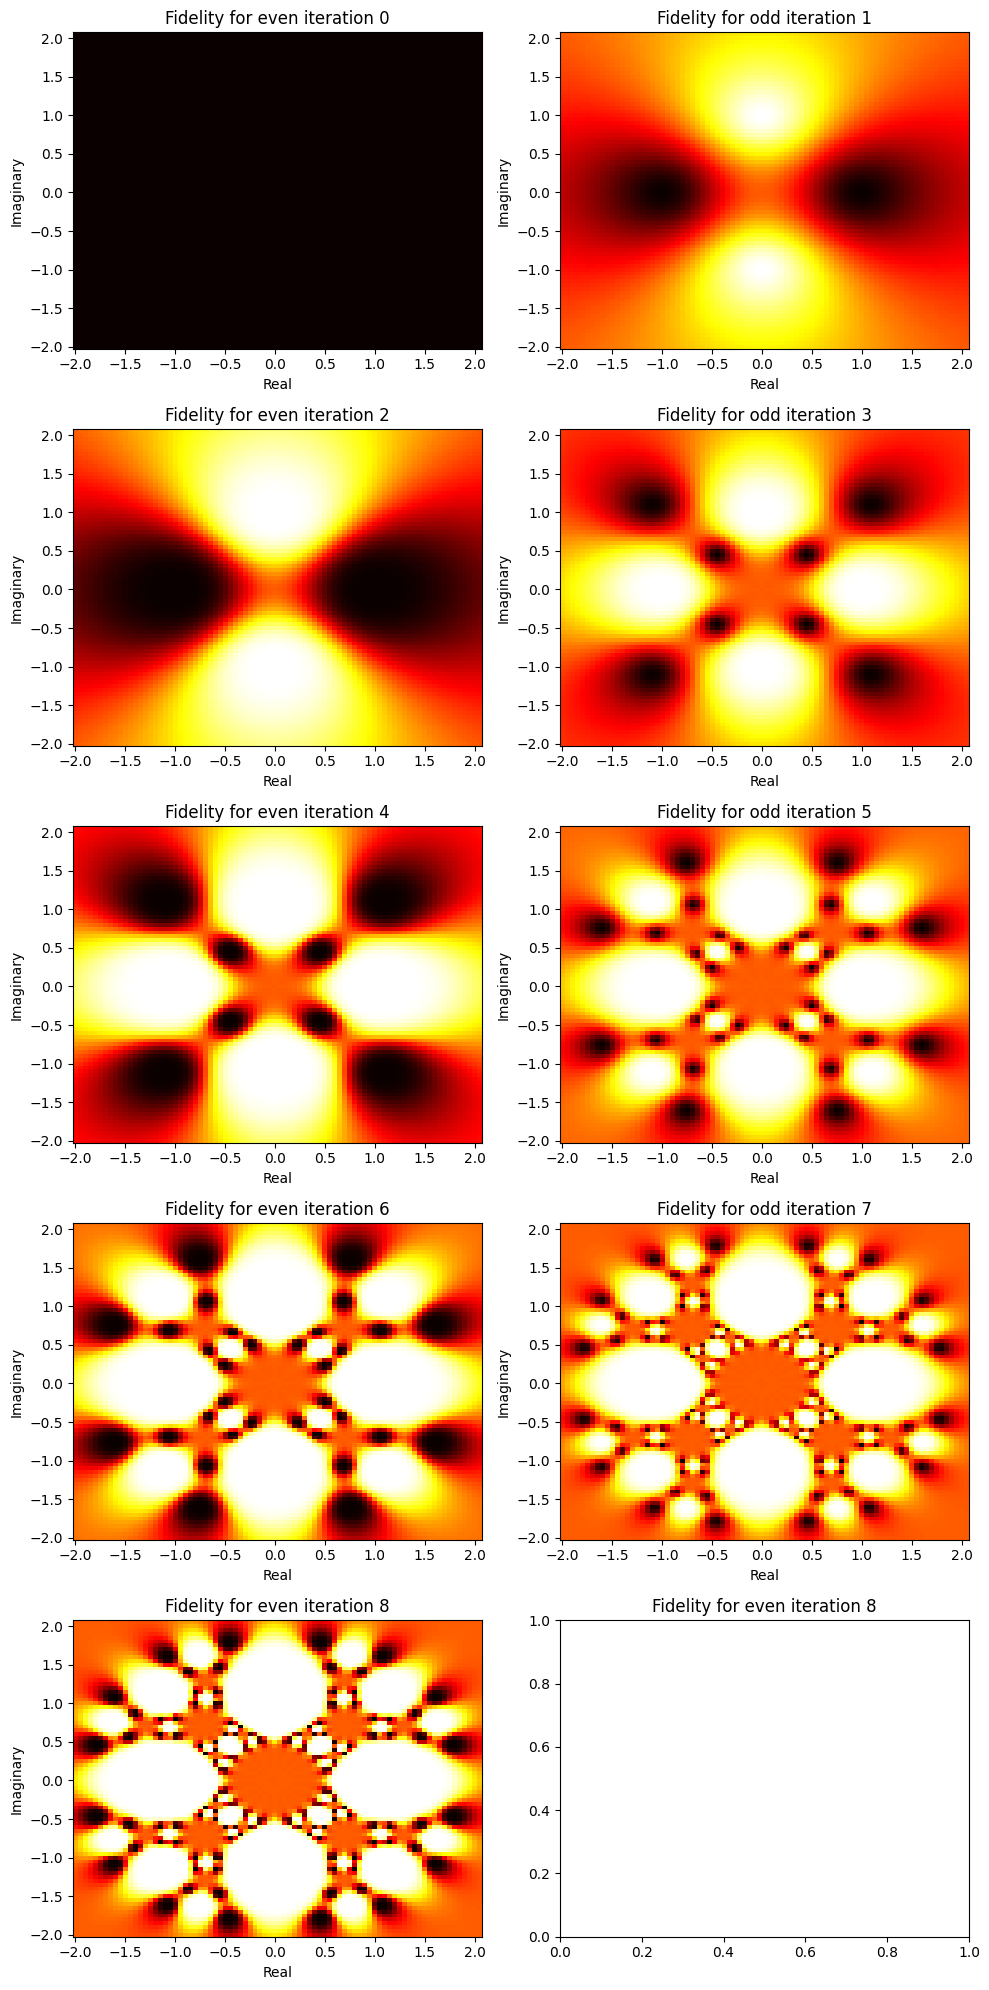

In [11]:
fig, axs = plt.subplots(5, 2,figsize=(10, 20))

#initializing the state
for c in np.arange(9):

    psi_complex = np.empty(4,dtype=complex)
    real = []
    imag = []
    f_even =[]
    f_odd =[]
    fidelity = 0

    for y in np.arange(-2,2.1,0.05):

        real_part = y
        for i in np.arange(-2,2.1,0.05):
            imag_part = i
            psi_complex[0] = 1
            psi_complex[1] = 0
            psi_complex[2] = 0 
            psi_complex[3] = complex(real_part, imag_part) * 1
        

            psi_1=(psi_complex.reshape(4,))/np.linalg.norm(psi_complex)

            psi_2=psi_1


            

            for i in np.arange(c):

                psi = np.kron(psi_1,psi_2)
            

                #performing swap operation 
                swap_tensored =np.kron(identity,np.kron(swap,identity))
                swaped_state= np.matmul(swap_tensored,psi)


                #cnot operation on swapped qubits 
                cnot = np.kron(CNOT_matrix,CNOT_matrix)
                state_after_cnot = np.matmul(cnot,swaped_state)

                #swapping the states back 
                original_psi = np.matmul(swap_tensored,state_after_cnot)

                #hadamard operation 
                tensored_hadamard = np.kron(hadamard,np.kron(hadamard,np.identity(4)))
                final_state_after_hadamard =np.matmul(tensored_hadamard,original_psi)


                #measurement
                projector=np.array([[1,0],[0,0]])
                projector_tensored = np.kron(np.identity(4),np.kron(projector,projector))

                measured = np.dot(projector_tensored,final_state_after_hadamard)


                #tracing out the measured copy
                first_copy_of_the_state = np.trace(measured.reshape(2,2,2,2),axis1=2,axis2=3)


                #creating bell state
                bell_state = (np.array([[1],[0],[0],[1]]) * (1/ np.sqrt(2))).reshape(4,)


                # preparation of density matrix of bell state and psi state by taking the outer product between the states
                density_matrix_bell = np.outer((bell_state),np.conjugate(bell_state)) 

                #dividing by the trace of density matrix to make it 1
                density_matrix_pp = np.outer(first_copy_of_the_state,np.conjugate(first_copy_of_the_state)) / np.trace(np.outer((first_copy_of_the_state),np.conjugate(first_copy_of_the_state)))


                #calculation of fidelity
                x = np.matmul(np.conjugate(bell_state.reshape(1,4)),np.matmul(density_matrix_pp,bell_state))
                fidelity = x

                psi_1 = first_copy_of_the_state.reshape(4,)
                psi_2 = first_copy_of_the_state.reshape(4,)
            
            
            if c%2==0:
                f_even=f_even+[fidelity]
            else:
                f_odd=f_odd+[fidelity]
            
        
            
    y = np.arange(-2, 2.1, 0.05)
    x = np.arange(-2, 2.1, 0.05)
    X, Y = np.meshgrid(x, y)

    if c%2==0:
        F_even = np.array(f_even).reshape(len(y), len(x))

        
        axs[c//2, 0].pcolormesh(X, Y, np.abs(F_even), cmap='hot', shading='auto', vmin=0, vmax=1)
        axs[c//2, 0].set_title(f'Fidelity for even iteration {c}')
        
    
        axs[c//2, 0].set_xlabel('Real')  # Set x-axis label for subplot in the first column
        axs[c//2, 0].set_ylabel('Imaginary')  # Set y-axis label for subplot in the first column

        plt.title(f'Fidelity for even iteration {c}')
        
    

    
    else:
        F_odd = np.array(f_odd).reshape(len(y), len(x))

        # Plot for odd iterations in the second column
        
        axs[c//2, 1].pcolormesh(X, Y, np.abs(F_odd), cmap='hot', shading='auto', vmin=0, vmax=1)
        axs[c//2, 1].set_title(f'Fidelity for odd iteration {c}')
        axs[c//2, 1].set_xlabel('Real')  # Set x-axis label for subplot in the second column
        axs[c//2, 1].set_ylabel('Imaginary')  # Set y-axis label for subplot in the second column
        
        plt.title(f'Fidelity for odd iteration {c}')
        
          

plt.tight_layout()
plt.show()



